### Load Saved Section if exists

### Load libraries, functions, palette, theme

In [1]:
import os

In [2]:
# read file from another directory
path = \
    ('/Users/a-chasovsky/Library/CloudStorage/GoogleDrive-alexanderchasovsky@gmail.com/'
     'Мой диск/Data Science Projects/pers_economics_rus/')

os.chdir(path)

# run stopwatch
from tools import Stopwatch
stopwatch = Stopwatch()
start = stopwatch.start()

# import libraries, etc.
%run load.ipynb

# and go back to current directory ('current_path' variable is assigned in _load.ipynb)
os.chdir(current_path)

In [3]:
dir = 'img'

In [4]:
economics_data = loadit('economics_data', dir='data/00-Datasets/')

In [5]:
len(economics_data)

93

## <font color='#2A5899'> Инфляция 1990-х

### Preparing data

In [6]:
pci = economics_data['9.5'].copy()

In [7]:
pci

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Year,260.4,2608.8,939.9,315.1,231.3,121.8,111.0,184.4,136.5,120.2,...,111.4,112.9,105.4,102.5,104.3,103.0,104.9,108.4,111.9,107.4
January,106.2,345.3,125.8,117.9,117.8,104.1,102.3,101.5,108.4,102.3,...,100.6,103.8,101.0,100.6,100.3,101.0,100.4,100.7,101.0,100.8
February,104.8,138.0,124.7,110.8,111.0,102.8,101.5,100.9,104.1,101.0,...,100.7,102.2,100.6,100.2,100.2,100.4,100.3,100.8,101.2,100.5
March,106.3,129.9,120.1,107.4,108.9,102.8,101.4,100.6,102.8,100.6,...,101.0,101.2,100.5,100.1,100.3,100.3,100.6,100.7,107.6,100.4
April,163.5,121.7,118.7,108.5,108.5,102.2,101.0,100.4,103.0,100.9,...,100.9,100.5,100.4,100.3,100.4,100.3,100.8,100.6,101.6,100.4
May,103.0,111.9,118.1,106.9,107.9,101.6,100.9,100.5,102.2,101.8,...,100.9,100.4,100.4,100.4,100.4,100.3,100.3,100.7,100.1,100.3
June,101.2,119.1,119.9,106.0,106.7,101.2,101.1,100.1,101.9,102.6,...,100.6,100.2,100.4,100.6,100.5,100.0,100.2,100.7,99.6,100.4
July,100.6,110.6,122.4,105.3,105.4,100.7,100.9,100.2,102.8,101.8,...,100.5,100.8,100.5,100.1,100.3,100.2,100.4,100.3,99.6,100.6
August,100.5,108.6,126.0,104.6,104.6,99.8,99.9,103.7,101.2,101.0,...,100.2,100.4,100.0,99.5,100.0,99.8,100.0,100.2,99.5,100.3
September,101.1,111.5,123.0,108.0,104.5,100.3,99.7,138.4,101.5,101.3,...,100.6,100.6,100.2,99.8,100.2,99.8,99.9,100.6,100.0,100.9


In [8]:
plot_data = pci[1992][1:]

In [9]:
plot_data.index = plot_data.index + ' 1992'

In [10]:
for i in range(1993, 2000):
    plot_data_ = pci[i][1:]
    plot_data_.index = plot_data_.index + ' ' + str(i)
    plot_data = pd.concat([plot_data, plot_data_], axis=0)

In [11]:
plot_data.index = [to_date(x, kind='%B %Y') for x in plot_data.index]

In [12]:
plot_data_smoothed = smoothed(plot_data, n=1200, datetime_index=True)

In [13]:
plot_data_smoothed

,value
1992-01-01 00:00:00.000000000,345.300000
1992-01-03 09:52:05.604670558,315.780544
1992-01-05 19:44:11.209341117,288.954132
1992-01-08 05:36:16.814011676,264.696635
1992-01-10 15:28:22.418682235,242.883924
...,...
1999-11-21 08:31:37.581317792,101.231942
1999-11-23 18:23:43.185988352,101.245640
1999-11-26 04:15:48.790658912,101.261527
1999-11-28 14:07:54.395329472,101.279637


In [28]:
# Geraschenko - 17 July 1992
plot_text_ger = '''
Назначение
В.Геращенко на пост
председателя ЦБ
'''
# monetary reform 26 July - Decembder 1993
plot_text_reform = '''
Начало
денежной реформы
'''
# 'black tuesday' - 11 October 1994
plot_text_tuesday = '''
Черный вторник,
отставка В.Геращенко
'''
# President elections
plot_text_elec = '''
Выборы президента РФ
'''
# PCO January 1992
text_commentary = '''
*ИПЦ в Январе 1992 г.
       равен 345.3%.
'''

In [15]:
# Yeltsin - Supreme Soviet controversy active phase - March 20 1992 - 4 October 1993
start_controversy = dt.datetime.strptime('20-03-1992', '%d-%m-%Y')
end_controversy = dt.datetime.strptime('04-10-1993', '%d-%m-%Y')
plot_controversy = \
    plot_data_smoothed.loc[start_controversy:end_controversy].copy()

In [16]:
# Gaidar stabilization - 2 January 1992 - 17 July 1992
start_stab1 = dt.datetime.strptime('02-12-1991', '%d-%m-%Y')
end_stab1 = dt.datetime.strptime('17-07-1992', '%d-%m-%Y')
plot_stab1 = plot_data_smoothed.loc[start_stab1:end_stab1].copy()

In [17]:
# Gaidar-Fedorov stabilization - 1 September 1993 - 1 January 1994
start_stab2 = dt.datetime.strptime('01-08-1993', '%d-%m-%Y')
end_stab2 = dt.datetime.strptime('01-12-1993', '%d-%m-%Y')
plot_stab2 = plot_data_smoothed.loc[start_stab2:end_stab2].copy()

In [18]:
# Chubais stabilization - 1 January 1995 - 16 January 1996
start_stab3 = dt.datetime.strptime('01-12-1994', '%d-%m-%Y')
end_stab3 =  dt.datetime.strptime('16-12-1995', '%d-%m-%Y')
plot_stab3 = plot_data_smoothed.loc[start_stab3:end_stab3].copy()

### Plots

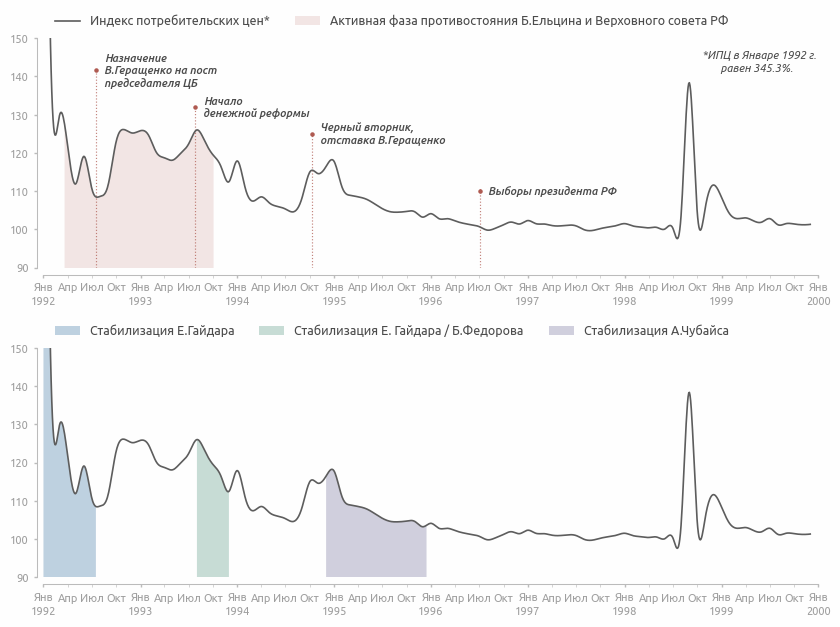

Image 'Financial-stabilization-1990s.png' successfully saved into 'img' directory


In [30]:
fig, ax = plt.subplots(nrows=2, figsize=(10, 7))

# title
# ax[0].set_title(
#     'Ключевые события и этапы финансовой стабилизации 1990-х годов',
#     **title_inline)

# AXIS 0
# PCI curve
ax[0].plot(
    plot_data_smoothed, color=palette[0],
    label='Индекс потребительских цен*')
# Geraschenko to CB - 17 July 1992 (17 of 31 == 0.57 of 1.00)
plot_timemarker(
    text=plot_text_ger, x=dt.datetime.strptime('17-07-1992', '%d-%m-%Y'), 
    weight='medium', y_text=141.6, y_line=0.85, delta=dt.timedelta(days=30),
    color_scatter=palette[1], style='italic', ax=ax[0])
# monetary reform 26 July - Decembder 1993 (26 of 31 == 0.87 of 1.00)
plot_timemarker(
    text=plot_text_reform, x=dt.datetime.strptime('26-07-1993', '%d-%m-%Y'),
    weight='medium', y_text=132, y_line=0.7, delta=dt.timedelta(days=30),
    color_scatter=palette[1], style='italic', ax=ax[0])
# 'black tuesday' - 11 October 1994 (11 of 31 == 0.37 of 1.00)
plot_timemarker(
    text=plot_text_tuesday, x=dt.datetime.strptime('11-10-1994', '%d-%m-%Y'),
    weight='medium', y_text=125, y_line=0.58, delta=dt.timedelta(days=30),
    color_scatter=palette[1], style='italic', ax=ax[0])
# President elections 03 July 1996
plot_timemarker(
    text=plot_text_elec, x=dt.datetime.strptime('03-07-1996', '%d-%m-%Y'),
    weight='medium', y_text=110, y_line=0.35, delta=dt.timedelta(days=30),
    color_scatter=palette[1], style='italic', ax=ax[0])
# Yeltsin - Supreme Soviet controversy active phase
ax[0].fill_between(
    x=plot_controversy.index,
    y1=85, y2=plot_controversy['value'],
    color=palette[1], alpha=0.15, ec='none',
    label='Активная фаза противостояния Б.Ельцина и Верховного совета РФ')
# legend
ax[0].legend(ncols=2, **legend_inline)
# ylim
ax[0].set_xlim(left=dt.datetime.strptime('01-12-1991', '%d-%m-%Y'))
ax[0].set_ylim(90, 150)
ax[0].grid(False)
# custmize xaxis r-style
ax[0].set_xlim(ax[0].get_xticks()[1], ax[0].get_xticks()[-1])
ax[0].spines['bottom'].set_position(('outward', 5))
ax[0].spines['bottom'].set_color(custom_axis_color)
ax[0].spines['left'].set_position(('outward', 5))
ax[0].spines['left'].set_color(custom_axis_color)
ax[0].spines['left'].set_linewidth(0.75)
ax[0].spines['bottom'].set_bounds(
    ax[0].get_xticks()[0], ax[0].get_xticks()[-1])
ax[0].spines['bottom'].set_linewidth(0.75)
# commentary
ax[0].text(
    x=0.85, y=0.80, s=text_commentary, style='italic',
    fontsize=8, transform=ax[0].transAxes)
# date format
axis_new_year(
    language='rus', year_axis_pad=-0.1,
    months_as_minor=True, months_pad=3, ax=ax[0])
ax[0].tick_params(axis='both', direction='out', color=custom_axis_color)
ax[0].tick_params(which='minor', direction='out', color='#CCCCCC')


# AXIS 1
# PCI curve
ax[1].plot(
    plot_data_smoothed, color=palette[0])
# Gaidar stabilization
ax[1].fill_between(
    x=plot_stab1.index,
    y1=85, y2=plot_stab1['value'],
    color=palette[2], alpha=0.4, ec='none',
    label='Стабилизация Е.Гайдара')
# Fedorov stabilization
ax[1].fill_between(
    x=plot_stab2.index,
    y1=85, y2=plot_stab2['value'],
    color=palette[3], alpha=0.3, ec='none',
    label='Стабилизация Е. Гайдара / Б.Федорова')
# Chubais stabilization
ax[1].fill_between(
    x=plot_stab3.index,
    y1=85, y2=plot_stab3['value'],
    color=palette[7], alpha=0.3, ec='none',
    label='Стабилизация А.Чубайса')

# legend
ax[1].legend(ncols=3, **legend_inline)
# ylim
ax[1].set_xlim(left=dt.datetime.strptime('01-12-1991', '%d-%m-%Y'))
ax[1].set_ylim(90, 150)
ax[1].grid(False)
# custmize xaxis r-style
ax[1].set_xlim(ax[1].get_xticks()[1], ax[1].get_xticks()[-1])
ax[1].spines['bottom'].set_position(('outward', 5))
ax[1].spines['bottom'].set_color(custom_axis_color)
ax[1].spines['left'].set_position(('outward', 5))
ax[1].spines['left'].set_color(custom_axis_color)
ax[1].spines['left'].set_linewidth(0.75)
ax[1].spines['bottom'].set_bounds(
    ax[1].get_xticks()[0], ax[1].get_xticks()[-1])
ax[1].spines['bottom'].set_linewidth(0.75)
# date format
axis_new_year(
    language='rus', year_axis_pad=-0.105, 
    months_as_minor=True, months_pad=4, ax=ax[1])
ax[1].tick_params(axis='both', direction='out', color=custom_axis_color)
ax[1].tick_params(which='minor', direction='out', color='#CCCCCC')

plt.subplots_adjust(hspace=0.35)
plt.show()

savefig('Financial-stabilization-1990s', dir=dir, dpi=100)

In [23]:
set_location()

### Execution time

In [21]:
print(f'Execution time: {stopwatch.stop(start)}')

Execution time: 0:00:12
